<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGQC" data-toc-modified-id="LLMGQC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGQC</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Assembly" data-toc-modified-id="Assembly-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Assembly</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#MetaQUAST-summary" data-toc-modified-id="MetaQUAST-summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MetaQUAST summary</a></span><ul class="toc-item"><li><span><a href="#Post-assembly" data-toc-modified-id="Post-assembly-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Post-assembly</a></span></li><li><span><a href="#Post-resmico" data-toc-modified-id="Post-resmico-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Post-resmico</a></span></li><li><span><a href="#Diff-in-contigs-after-filtering" data-toc-modified-id="Diff-in-contigs-after-filtering-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Diff in contigs after filtering</a></span></li></ul></li><li><span><a href="#PR-curve" data-toc-modified-id="PR-curve-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>PR curve</a></span></li></ul></li><li><span><a href="#Dataset-summary" data-toc-modified-id="Dataset-summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dataset summary</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Assess ResMiCo accuracy with the MBARC-26 mock community
  * DOI: https://doi.org/10.1038/sdata.2016.81

# Var

In [1]:
work_dir = '/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/'

read_dir = file.path(work_dir, 'LLMGQC')
genome_dir = file.path(work_dir, 'ref_genomes', 'MBARC-26')

# params
threads = 6

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init(threads=threads)

In [5]:
library(PRROC)

# LLMGQC

### Config

In [6]:
config_file = file.path(read_dir, 'config.yaml')
cat_file(config_file)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/samples.tsv

# output location
output_dir: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# ionice for reducing I/O load (use "-c 2" for noraml I/O usage) 
ionice: -c 3 

#-- Software parameters --#
# See the README for info on all major parameters
# Use "Skip" to skip any of these steps. If no params for rule, use: ""
params:
  just_read1: False
  download:
    dump: --dump-method fasterq-dump --use-prefetch --bufsize 50M
  initial_checks:
    validate_reads: ""
    convert_fastq_to_1.8: ""
  subsample:
    num_reads: Skip
  raw:
    seqkit: ""
    fastqc: ""
  deduplication:
    clumpify: Skip #dedupe=t dupedist=40 optical=t spany=t adjacent=t
    seqkit: ""
    fastqc: ""
  quality:      
    bbduk: ref=./adapters/b

### Run

```
# (base) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmgqc
screen -L -S llmgqc-mock snakemake /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/config.yaml 30 -F
```

## Summary

In [7]:
F = file.path(work_dir, 'LLMGQC', 'reports', 'final', 'seqkit_stats.tsv')
Fread(F)

Sample,Read,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,Q20...,Q30...,GC...
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int64>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
BMock12,1,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/BMock12/R1_final.fq.gz,FASTQ,DNA,209143660,31323356697,100,149.8,151,150,151,151,0,151,97.08,93.40,51.40
BMock12,2,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/BMock12/R2_final.fq.gz,FASTQ,DNA,209143660,31156239500,100,149.0,151,150,151,151,0,151,96.02,91.53,51.37
MBARC-26,1,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/MBARC-26/R1_final.fq.gz,FASTQ,DNA,156480171,23035510442,100,147.2,150,149,150,150,0,150,98.18,90.98,49.26
MBARC-26,2,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/MBARC-26/R2_final.fq.gz,FASTQ,DNA,156480171,22837453225,100,145.9,150,148,150,150,0,150,97.41,88.35,49.18


#### Notes

* A LARGE number of sequences per sample
* I will need to subsample for the metagenome assemblies

# Assembly

### Config

In [9]:
F = file.path(work_dir, 'LLMGA', 'MBARC-26', 'reads-2mil', 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/MBARC-26/samples.txt

# output location
output_dir: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/MBARC-26/reads-2mil/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- reference genomes for metacompass --#
metacompass_ref: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUKMZ-BGI250/llmga-find-refs/references/drep/dereplicated_genomes.fna

#-- master control --#
# which major parts of the pipline to run 
run_assembly: True
run_binning: False
run_other_assembly: False

#-- software parameters --#
# Notes:
## see "Notes on the `config.yaml` file" in the README
params:
  # misc
  ionice: -c 3
  use_gpu: True
  # raw reads
  reads:
    subsample: 2000000
    fastqc: ""  
  # metacompass (per-sample ref-based assembly); skipped if using graphbin2
  metacom

### Run

```
(snakemake) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmga
$ screen -L -S llmga-MBARC-26 ./snakemake_sge.sh /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/MBARC-26/reads-2mil/config.yaml 30 -F --notemp
```

## MetaQUAST summary

In [10]:
base_dir = file.path(work_dir, 'LLMGA', 'MBARC-26', 'reads-2mil')

### Post-assembly

In [11]:
# post-assembly contig report
F = file.path(base_dir, 'final_contigs', 'MBARC-26', 'metaquast', 'combined_reference', 'report.tsv')
contigs_asmbl = Fread(F) 

df.dims(20)
contigs_asmbl %>% head(n=20)
df.dims()

Assembly,contigs_final
<chr>,<chr>
# contigs (>= 0 bp),9626
# contigs (>= 1000 bp),9626
# contigs (>= 5000 bp),1606
# contigs (>= 10000 bp),699
# contigs (>= 25000 bp),227
# contigs (>= 50000 bp),110
Total length (>= 0 bp),46713207
Total length (>= 1000 bp),46713207
Total length (>= 5000 bp),30957704


In [12]:
# post-assembly misassembly report
F = file.path(base_dir, 'final_contigs', 'MBARC-26', 'metaquast', 'combined_reference', 
              'contigs_reports', 'contigs_report_contigs_final.mis_contigs.info')
cat_file(F)

contig_203
Extensive misassembly (interspecies translocation) between 4768 1 and 6242 4769
contig_360
Extensive misassembly (interspecies translocation) between 289 1 and 290 3824
contig_522
Extensive misassembly (relocation, inconsistency = -18717) between 1 1365 and 1366 2786
contig_558
Extensive misassembly (interspecies translocation) between 1 1407 and 2623 1408
contig_626
Extensive misassembly (interspecies translocation) between 1 1656 and 1657 2311
contig_810
Extensive misassembly (relocation, inconsistency = 226729) between 673 1 and 674 1852
contig_817
Extensive misassembly (translocation) between 1137 1 and 1138 1813
contig_850
Extensive misassembly (relocation, inconsistency = -438752) between 256 1 and 1760 257
contig_1075
Extensive misassembly (relocation, inconsistency = -93676) between 1 1096 and 1097 1354
contig_1076
Extensive misassembly (relocation, inconsistency = 2117114) between 966 1 and 1354 967
contig_1124
Extensive misassembly (relocation, inconsistency = -204

### Post-resmico

In [13]:
# post-assembly contig report
F = file.path(base_dir, 'filtered_contigs', 'MBARC-26', 'metaquast', 'combined_reference', 'report.tsv')
contigs_resmico = Fread(F) 

df.dims(20)
contigs_resmico %>% head(n=20)
df.dims()

Assembly,contigs_filtered
<chr>,<chr>
# contigs (>= 0 bp),7431
# contigs (>= 1000 bp),7431
# contigs (>= 5000 bp),693
# contigs (>= 10000 bp),280
# contigs (>= 25000 bp),95
# contigs (>= 50000 bp),54
Total length (>= 0 bp),25041765
Total length (>= 1000 bp),25041765
Total length (>= 5000 bp),12542648


In [14]:
# post-resmico misassembly report
F = file.path(base_dir, 'filtered_contigs', 'MBARC-26', 'metaquast', 'combined_reference', 
              'contigs_reports', 'contigs_report_contigs_filtered.mis_contigs.info')
cat_file(F)

contig_850
Extensive misassembly (relocation, inconsistency = -438752) between 256 1 and 1760 257
contig_1316
Extensive misassembly (relocation, inconsistency = 142715) between 1 228 and 1037 229
contig_1452
Extensive misassembly (relocation, inconsistency = -8438) between 1 315 and 316 1017
contig_3975
Extensive misassembly (relocation, inconsistency = 1873) between 1 4193 and 4194 6838
contig_4352
Extensive misassembly (relocation, inconsistency = 4134766) between 1685 1 and 1901 1686
contig_4906
Extensive misassembly (interspecies translocation) between 74 1 and 1182 75
contig_5244
Extensive misassembly (inversion) between 1 764 and 1013 765
contig_5874
Extensive misassembly (interspecies translocation) between 1099 1 and 1526 1100
contig_6316
Extensive misassembly (relocation, inconsistency = 2712857) between 42 163 and 1025 164
contig_6364
Extensive misassembly (relocation, inconsistency = -1958) between 1 80856 and 81187 105725
contig_8079
Extensive misassembly (inversion) betwee

### Diff in contigs after filtering

In [15]:
# number of contigs
x = contigs_asmbl %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_filtered %>% first %>% as.numeric

print(x - y)
y / x * 100

[1] 2195


[1] 77.19717

In [16]:
# total length
x = contigs_asmbl %>% 
    filter.(Assembly == 'Total length') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == 'Total length') %>%
    .$contigs_filtered %>% first %>% as.numeric

y / x * 100

[1] 53.60746

In [17]:
# N50
x = contigs_asmbl %>% 
    filter.(Assembly == 'N50') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == 'N50') %>%
    .$contigs_filtered %>% first %>% as.numeric

y / x * 100

[1] 43.01977

## PR curve

In [18]:
# loading resmico scores
F = file.path(base_dir, 'filtered_contigs', 'resmico', 'MBARC-26', 'predictions.csv.gz')
resmico_scores = Fread(F, sep=',')
resmico_scores

cont_name,length,label,score,min,mean,std,max
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/MBARC-26/contig_4814,1226,0,0.02842026,0.02842026,0.02842026,0,0.02842026
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/MBARC-26/contig_7220,1302,0,0.67616111,0.67616111,0.67616111,0,0.67616111
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/MBARC-26/contig_2405,1415,0,0.006692549,0.006692549,0.006692549,0,0.006692549
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/MBARC-26/contig_2406,1414,0,0.165508315,0.165508315,0.165508315,0,0.165508315


In [25]:
# filtering into class0 & class1 
error_contigs = c('contig_203', 'contig_360', 'contig_522', 'contig_558', 'contig_626',
                  'contig_810', 'contig_817', 'contig_850', 'contig_1075', 'contig_1076',
                  'contig_1124', 'contig_1249', 'contig_1316', 'contig_1399', 'contig_1452',
                  'contig_1476', 'contig_1820', 'contig_1825', 'contig_1887', 'contig_1931',
                  'contig_1943', 'contig_2037', 'contig_2112', 'contig_2287', 'contig_2323',
                  'contig_2562', 'contig_2958', 'contig_2993', 'contig_3047', 'contig_3109',
                  'contig_3163', 'contig_3311', 'contig_3323', 'contig_3386', 'contig_3514',
                  'contig_3707', 'contig_3723', 'contig_3818', 'contig_3878', 'contig_3941',
                  'contig_3975', 'contig_4245', 'contig_4334', 'contig_4352', 'contig_4607',
                  'contig_4660', 'contig_4812', 'contig_4906', 'contig_5091', 'contig_5140',
                  'contig_5244', 'contig_5254', 'contig_5379', 'contig_5586', 'contig_5647',
                  'contig_5671', 'contig_5698', 'contig_5785', 'contig_5874', 'contig_5883',
                  'contig_5925', 'contig_6316', 'contig_6341', 'contig_6364', 'contig_6528',
                  'contig_6613', 'contig_6750', 'contig_6944', 'contig_7004', 'contig_7007',
                  'contig_7176', 'contig_7217', 'contig_7424', 'contig_7527', 'contig_7762',
                  'contig_7784', 'contig_7916', 'contig_8028', 'contig_8079', 'contig_8152',
                  'contig_8208', 'contig_8374', 'contig_8462', 'contig_8468', 'contig_8511',
                  'contig_8560', 'contig_8717', 'contig_8854', 'contig_9044', 'contig_9068',
                  'contig_9100', 'contig_9118')

# stats
x = contigs_asmbl %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_final %>% first %>% as.numeric
cat('No. of contigs', x, '\n')
cat('No. of true misassemblies:', length(error_contigs), '\n')
cat('True error rate:', length(error_contigs) / x * 100, '%\n')

# error contigs
resmico_scores_c0 = resmico_scores %>%
    mutate.(contig_id = basename(cont_name)) %>%
    filter.(contig_id %in% error_contigs)

# background
resmico_scores_c1 = resmico_scores %>%
    mutate.(contig_id = basename(cont_name)) %>%
    filter.(! contig_id %in% error_contigs)

summary_x(resmico_scores_c0$score)
summary_x(resmico_scores_c1$score)

No. of contigs 9626 
No. of true misassemblies: 92 
True error rate: 0.9557449 %


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
score,0.03532088,0.8894507,0.9670471,0.9026203,0.9896474,0.9999727,0.17,0.069


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
score,0.0001613295,0.05324027,0.4143844,0.4271861,0.7677146,0.9999957,0.345,0.141


In [20]:
pr = pr.curve(scores.class0 = resmico_scores_c0$score, 
              scores.class1 = resmico_scores_c1$score, 
              curve=TRUE)
pr


  Precision-recall curve

    Area under curve (Integral):
     0.2327762 

    Area under curve (Davis & Goadrich):
     0.2323538 

    Curve for scores from  0.0001613295  to  0.9999957 
    ( can be plotted with plot(x) )


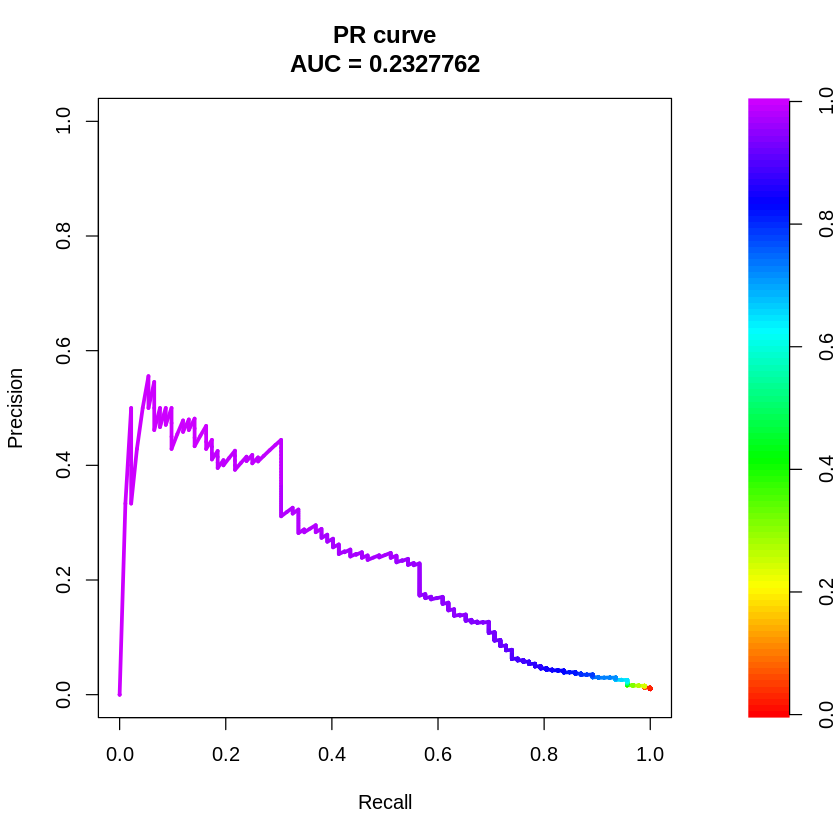

In [21]:
plot(pr)

In [22]:
roc = roc.curve(scores.class0 = resmico_scores_c0$score, 
                scores.class1 = resmico_scores_c1$score, 
                curve=TRUE)
roc


  ROC curve

    Area under curve:
     0.9148881 

    Curve for scores from  0.0001613295  to  0.9999957 
    ( can be plotted with plot(x) )


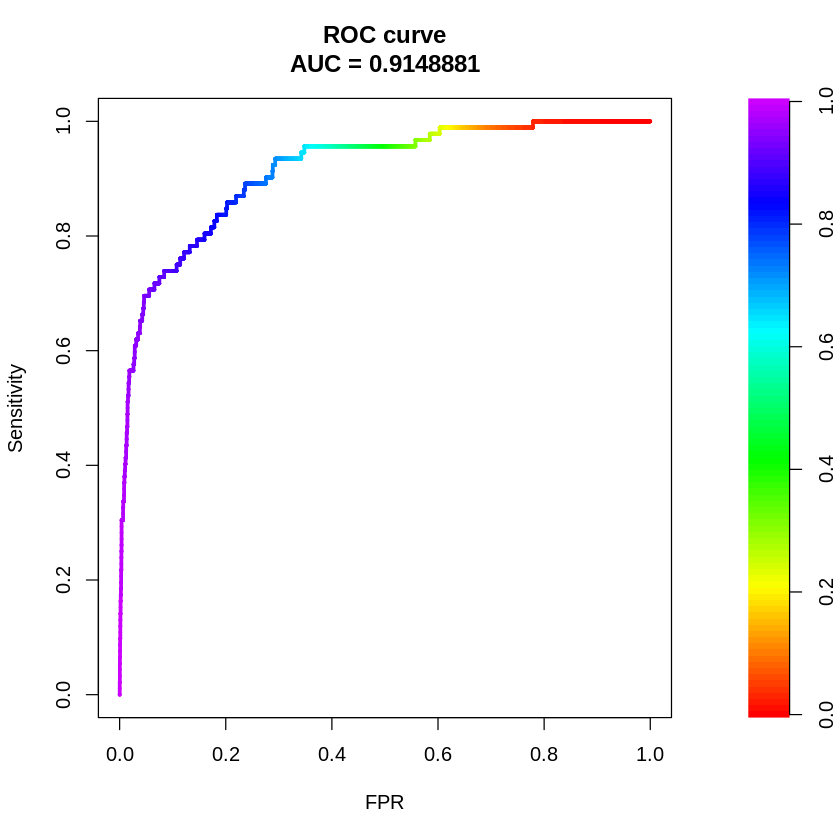

In [23]:
plot(roc)

# Dataset summary

In [35]:
dt_sum = data.table(
Dataset = c('BMock12', 'BMock12', 'MBARC-26', 'MBARC-26'),
mis_asmbl_perc = c(1.157895, 0.7678526, 0.5550536, 0.9557449),
Seq_depth = c(8e6, 2e6, 8e6, 2e6),
AUPRC = c(0.5633931, 0.7183236, 0.1309414, 0.2327762),
AUROC = c(0.9560891, 0.9867509, 0.8951677, 0.9148881)
)
dt_sum

Dataset,mis_asmbl_perc,Seq_depth,AUPRC,AUROC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BMock12,1.1578950,8e+06,0.5633931,0.9560891
BMock12,0.7678526,2e+06,0.7183236,0.9867509
MBARC-26,0.5550536,8e+06,0.1309414,0.8951677
MBARC-26,0.9557449,2e+06,0.2327762,0.9148881


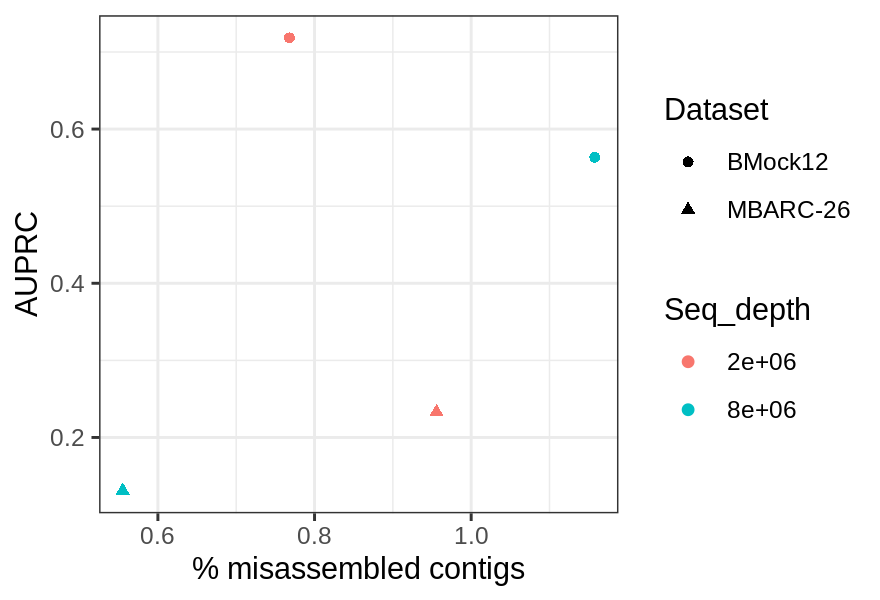

In [37]:
p.dims(4.4,3)
p = dt_sum %>%
    mutate.(Seq_depth = Seq_depth %>% as.character) %>%
    ggplot(aes(mis_asmbl_perc, AUPRC, shape=Dataset, color=Seq_depth)) +
    geom_point() +
    labs(x='% misassembled contigs') +
    theme_bw()
plot(p)

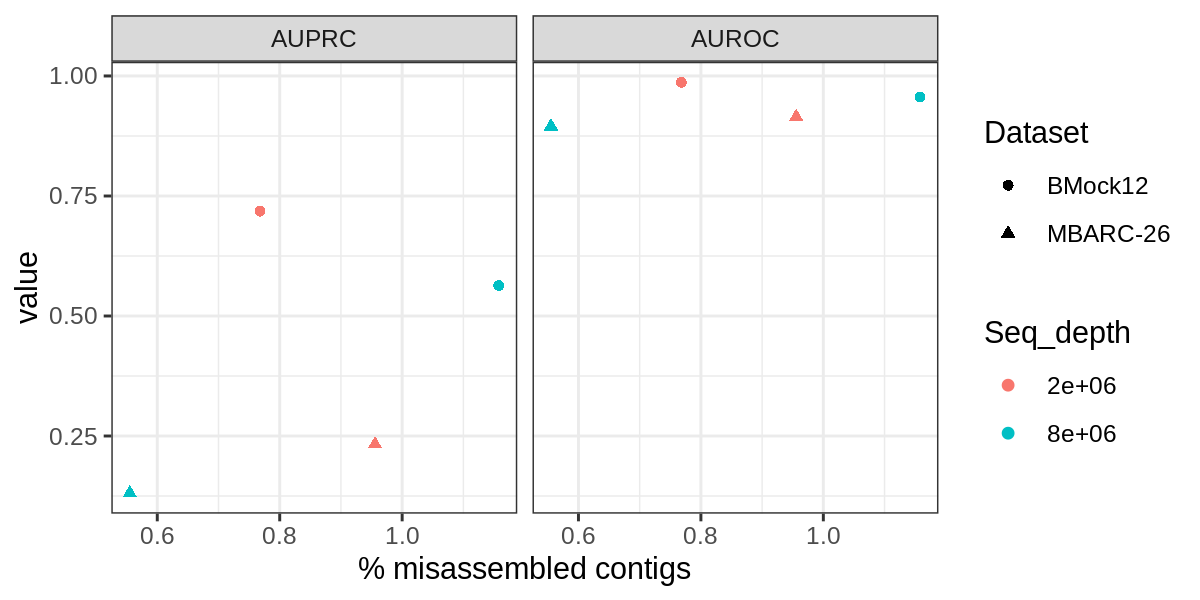

In [42]:
p.dims(6,3)
p = dt_sum %>%
    pivot_longer.(cols=c(-Dataset, -mis_asmbl_perc, -Seq_depth)) %>%
    mutate.(Seq_depth = Seq_depth %>% as.character) %>%
    ggplot(aes(mis_asmbl_perc, value, shape=Dataset, color=Seq_depth)) +
    geom_point() +
    labs(x='% misassembled contigs') +
    facet_grid( ~ name) +
    theme_bw()
plot(p)

# sessionInfo

In [24]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/DeepMAsED/envs/tidyverse/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] PRROC_1.3.1        clustermq_0.8.95.1 LeyLabRMisc_0.2.1  tidytable_0.6.3   
[5] data.table_1.14.0  ggplot2_3.3.5      tidyr_1.1.3        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7        pillar_1.6.1      compiler_4.1.0    plyr_1.8.6       
 [5] R.methods